# EOF Studies

## Importing packages and setting up containers

In [2]:
import os
import sys
from pathlib import Path
import subprocess
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from h5py import File
import itertools as it
import joblib
import time
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy.stats import norm
import random
from IPython.display import display, HTML, Image
import uproot as up
import mplhep as hep
# Use the ATLAS style in mplhep
plt.style.use(hep.style.ATLAS)

In [3]:
sys.path.append('/users/maboelela/PhD/DIPZ/The_DIPZ_Project/Fast_Rejection_Scheme/Flavor_Neutral_Studies')

%load_ext autoreload
%autoreload 2

from mlplGetter_functions import get_max_log_likelihood_an
from mlplGetter_functions import get_max_log_likelihood_an_hh4b
from mlplGetter_functions import get_max_log_likelihood_dist_MC
from mlplGetter_functions import get_max_log_likelihood_dist_hh4b
from mlplGetter_functions import get_max_log_likelihood_dist_EBdata

hypo = [
    #[ '4' , 'all' ],     
    #[ '4' , '6' ],          
    #[ '4' , '5' ],          
    #[ '3' , 'all' ],     
    [ '3' , '5' ],
    #[ '3' , '4' ],         
    #[ '2' , 'all' ],      
]

print("Getting MLPL (" + hypo[0][0] + ', ' + hypo[0][1] + ') distributions:')
folder_name = './MLPL_Distributions/mlpl_' + hypo[0][0] + '_' + hypo[0][1] + '/'
comb_num = int(hypo[0][0])
max_num = 9999999
if hypo[0][1] == 'all' :
    num_highest_pt = 555555
else: 
    num_highest_pt = int(hypo[0][1])

hh4b_dist, hh4b_dist_weights, num_bjets_chosen_list= get_max_log_likelihood_dist_hh4b("/users/maboelela/PhD/DIPZ/Datasets/hh4b_L1Filtered.h5", comb_num, max_num, num_highest_pt, 45, True)
EB_dist, EB_dist_weights = get_max_log_likelihood_dist_EBdata("/users/maboelela/PhD/DIPZ/Datasets/EBdata_large_L1Filtered.h5", "/users/maboelela/PhD/DIPZ/Datasets/EnhancedBiasWeights_440499.xml", comb_num, max_num, num_highest_pt, 45)


Getting MLPL (3, 5) distributions:
The initial number of events in the provided data sample is: 25164
The number of events passing the DIPZ hypo is in the sample is: 5477
The number of events passing the DIPZ hypo in the sample is less than the provided number, therefore all the sample was run over.
The time of execution of the (get_max_log_likelihood_dist) function is : 0.273126224676768 min
The initial number of events in the provided data sample is: 33692
The number of events passing the DIPZ hypo is in the sample is: 33416
The number of events passing the DIPZ hypo in the sample is less than the provided number, therefore all the sample was run over.
The time of execution of the (get_max_log_likelihood_dist) function for the (/users/maboelela/PhD/DIPZ/Datasets/EBdata_large_L1Filtered.h5) file is : 0.5208000659942627 min


## Discriminant Variable (MLPL) Overlayed Histograms & Cut Suggestion

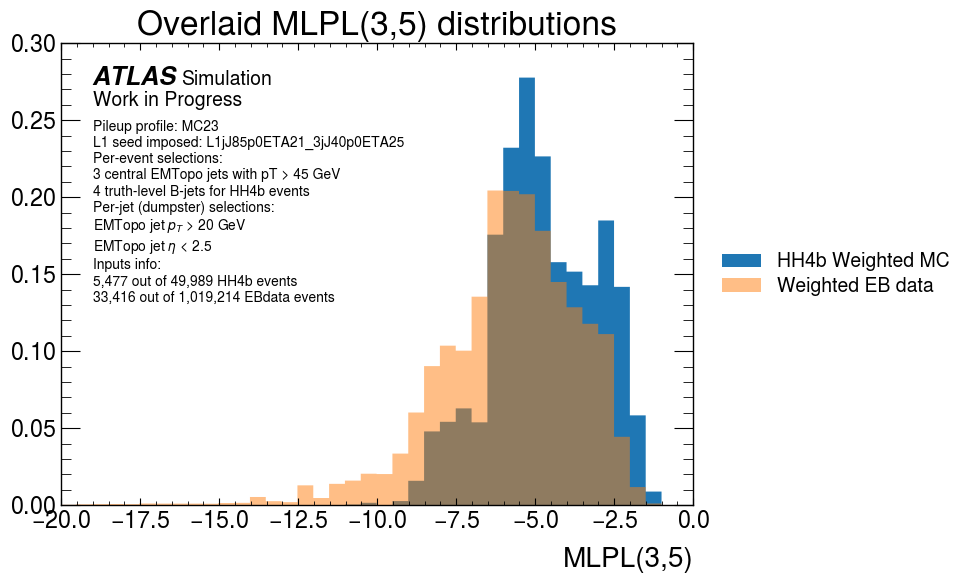

In [4]:
"""MLPL Overlayed Histograms"""
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
ax = plt.gca()
hep.atlas.label(ax, llabel="Simulation", loc=4, rlabel="Work in Progress")

minMLPL = min([min(EB_dist),min(hh4b_dist)
               #,min(jz0_dist),min(jz1_dist),min(jz2_dist),min(jz3_dist),min(jz4_dist),min(jz5_dist)
                ])
bins = np.linspace(minMLPL, 0, int(0-minMLPL) * 2)
plt.hist(hh4b_dist, bins, alpha=1, label='HH4b Weighted MC', histtype='stepfilled', density=True, weights=hh4b_dist_weights)
plt.hist(EB_dist, bins, alpha=0.5, label='Weighted EB data', histtype='stepfilled', density=True, weights = EB_dist_weights)
#plt.hist(jz0_dist, bins, alpha=1, label='JZ0', histtype='step')
#plt.hist(jz1_dist, bins, alpha=1, label='JZ1', histtype='step')
#plt.hist(jz2_dist, bins, alpha=1, label='JZ2', histtype='step')
#plt.hist(jz3_dist, bins, alpha=1, label='JZ3', histtype='step')
#plt.hist(jz4_dist, bins, alpha=1, label='JZ4', histtype='step')
#plt.hist(jz5_dist, bins, alpha=1, label='JZ5', histtype='step')

# Adding custom text
text_x = 0.05  # x position of the text, adjust as necessary
text_y = 0.87  # y position of the text, adjust as necessary
analysis_info = """
Pileup profile: MC23
L1 seed imposed: L1jJ85p0ETA21_3jJ40p0ETA25
Per-event selections:
3 central EMTopo jets with pT > 45 GeV
4 truth-level B-jets for HH4b events
Per-jet (dumpster) selections: 
EMTopo jet $p_T$ > 20 GeV 
EMTopo jet $\eta$ < 2.5
Inputs info:
5,477 out of 49,989 HH4b events
33,416 out of 1,019,214 EBdata events
"""
plt.text(text_x, text_y, analysis_info, transform=ax.transAxes, verticalalignment='top', fontsize=10)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim([-20,0])
plt.title("Overlaid MLPL(3,5) distributions")
plt.xlabel("MLPL(3,5)")
#plt.savefig(".png")
plt.show()

In [5]:
#print ("Ideally, we want to lose 0% (as small percentage as we can) of the signal and keep 0% (as small percentage as we can) of the backrground\n")
#print("---------------------------\n")
cuts = np.arange(-10,-2.5,0.1)
for i in cuts:
    print("For a " + str(i) + " MLPL(3,5) WP we: \n" 
          "keep " + str((np.array(hh4b_dist) > i).sum() / len(hh4b_dist) * 100) + "% of the hh->4b signal efficiency\n"
          "reject " + str((np.array(EB_dist) < i).sum() / len(EB_dist) * 100) + "% of the EB_data sample\n"
          #"reject " + str((np.array(jz0_dist) < i).sum() / len(jz0_dist) * 100) + "% of the dijet (jz0) background\n"
          #"reject " + str((np.array(jz1_dist) < i).sum() / len(jz1_dist) * 100) + "% of the dijet (jz1) background\n"
          #"reject " + str((np.array(jz2_dist) < i).sum() / len(jz2_dist) * 100) + "% of the dijet (jz2) background\n"
          #"reject " + str((np.array(jz3_dist) < i).sum() / len(jz3_dist) * 100) + "% of the dijet (jz3) background\n"
          #"reject " + str((np.array(jz4_dist) < i).sum() / len(jz4_dist) * 100) + "% of the dijet (jz4) background\n"
          #"reject " + str((np.array(jz5_dist) < i).sum() / len(jz5_dist) * 100) + "% of the dijet (jz5) background\n"
          "______________________________________________________________________________________________________\n"
         )

For a -10.0 MLPL(3,5) WP we: 
keep 99.90870914734343% of the hh->4b signal efficiency
reject 3.5910940866650707% of the EB_data sample
______________________________________________________________________________________________________

For a -9.9 MLPL(3,5) WP we: 
keep 99.90870914734343% of the hh->4b signal efficiency
reject 3.725760114915011% of the EB_data sample
______________________________________________________________________________________________________

For a -9.8 MLPL(3,5) WP we: 
keep 99.90870914734343% of the hh->4b signal efficiency
reject 3.8843667704093843% of the EB_data sample
______________________________________________________________________________________________________

For a -9.700000000000001 MLPL(3,5) WP we: 
keep 99.90870914734343% of the hh->4b signal efficiency
reject 4.054943739525975% of the EB_data sample
______________________________________________________________________________________________________

For a -9.600000000000001 MLPL(3,5) 

## ROC Curve Implementation

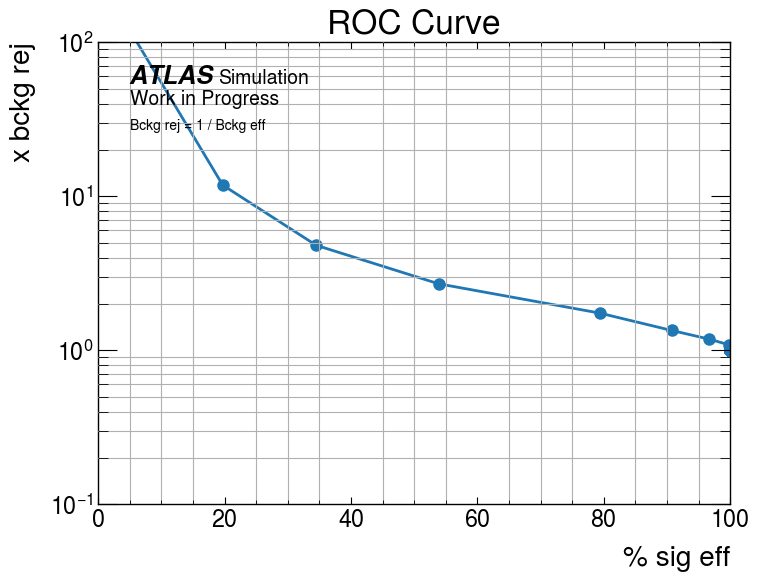

In [6]:
#Defining the binning
minMLPL = min([min(EB_dist),min(hh4b_dist),
               #min(jz0_dist),min(jz1_dist),min(jz2_dist),min(jz3_dist),min(jz4_dist),min(jz5_dist)
                ])
bin_array = np.linspace(minMLPL, 0, int(0-minMLPL))

#Creating the numpy histograms
signal_hist, _= np.histogram(hh4b_dist, bins = bin_array, weights=hh4b_dist_weights)
background_hist, _= np.histogram(EB_dist, bins = bin_array, weights=EB_dist_weights)

# Calculate cumulative sums from right to left (higher scores to lower)
signal_cumulative = np.cumsum(signal_hist[::-1])[::-1]
background_cumulative = np.cumsum(background_hist[::-1])[::-1]

# Total counts for normalization
total_signal = np.sum(signal_hist)
total_background = np.sum(background_hist)

# Calculate efficiencies and rejections
signal_efficiency = signal_cumulative / total_signal
background_efficiency = background_cumulative / total_background
background_rejection = 1 / background_efficiency

#Plotting the ROC curve
#ATLAS Style
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(8, 6))
ax = plt.gca()
hep.atlas.label(ax, llabel="Simulation", loc=4, rlabel="Work in Progress")

plt.plot(signal_efficiency * 100, background_rejection, marker='o', linestyle='-')

# Adding custom text
text_x = 0.05  # x position of the text, adjust as necessary
text_y = 0.87  # y position of the text, adjust as necessary
analysis_info = """
Bckg rej = 1 / Bckg eff
"""
plt.text(text_x, text_y, analysis_info, transform=ax.transAxes, verticalalignment='top', fontsize=10)

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('ROC Curve')
plt.xlabel('% sig eff')
plt.ylabel('x bckg rej')
plt.grid(which = "minor")
plt.minorticks_on()
plt.yscale("log")
plt.ylim([0.1,100])
plt.show()